In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df['hue']='0'
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df2['hue']='1'
df_wine = pd.concat([df, df2], ignore_index=True)

In [2]:
from sklearn.model_selection import train_test_split

X = df_wine.drop(['quality', 'hue'], axis=1)
y = df_wine['hue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test) # Array of 0's and 1's (red/white wine)
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(y_test, y_pred)))

Accuracy score: 0.9743589743589743

Confusion matrix: 
[[ 525   32]
 [  23 1565]]

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       557
           1       0.98      0.99      0.98      1588

    accuracy                           0.97      2145
   macro avg       0.97      0.96      0.97      2145
weighted avg       0.97      0.97      0.97      2145



[Text(558.0, 380.52, 'X[4] <= 0.209\ngini = 0.364\nsamples = 4352\nvalue = [1042, 3310]'),
 Text(279.0, 271.8, 'X[6] <= -1.093\ngini = 0.067\nsamples = 3215\nvalue = [112, 3103]'),
 Text(139.5, 163.07999999999998, 'X[4] <= -0.448\ngini = 0.41\nsamples = 118\nvalue = [84, 34]'),
 Text(69.75, 54.360000000000014, 'gini = 0.251\nsamples = 34\nvalue = [5, 29]'),
 Text(209.25, 54.360000000000014, 'gini = 0.112\nsamples = 84\nvalue = [79, 5]'),
 Text(418.5, 163.07999999999998, 'X[1] <= 3.071\ngini = 0.018\nsamples = 3097\nvalue = [28, 3069]'),
 Text(348.75, 54.360000000000014, 'gini = 0.015\nsamples = 3092\nvalue = [24, 3068]'),
 Text(488.25, 54.360000000000014, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(837.0, 271.8, 'X[6] <= -0.036\ngini = 0.298\nsamples = 1137\nvalue = [930, 207]'),
 Text(697.5, 163.07999999999998, 'X[7] <= -0.475\ngini = 0.092\nsamples = 934\nvalue = [889, 45]'),
 Text(627.75, 54.360000000000014, 'gini = 0.342\nsamples = 32\nvalue = [7, 25]'),
 Text(767.25, 54.360

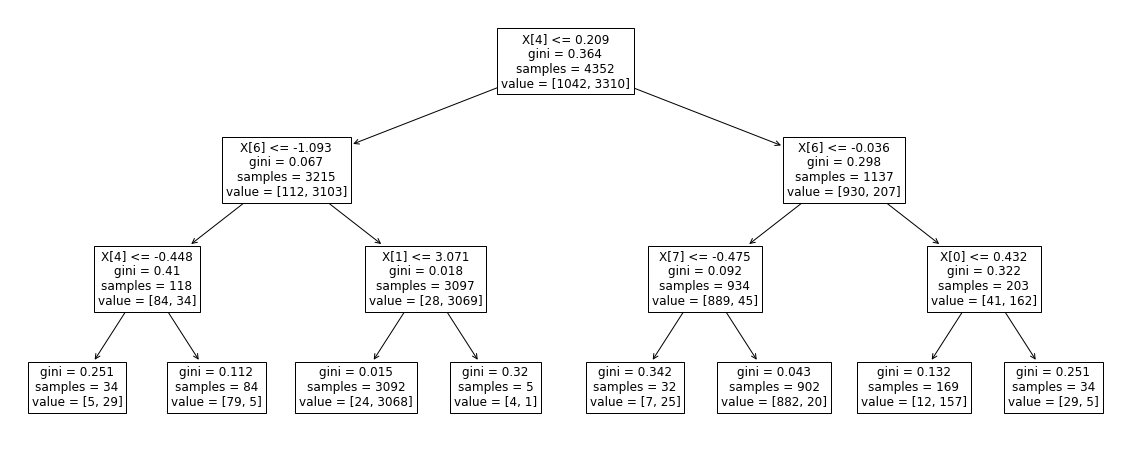

In [5]:
fig = plt.subplots(figsize=(20, 8))
tree.plot_tree(dt, fontsize=12)